In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

## 6.2.6 - Get City Weather Data¶

### Import Dependencies, and Initialize an Empty List and Counters

In [6]:
# Import Dependencies datetime module from datetime library
from datetime import datetime

# Create an empty list to hold the weather data

city_data = []

# print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04adbef39455200ca16d18e7aeb02de8


In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

### Handle API Request Errors with try-except Blocks

In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | qaanaaq
Processing Record 2 of Set 13 | butaritari
Processing Record 3 of Set 13 | bluff
Processing Record 4 of Set 13 | mushie
Processing Record 5 of Set 13 | arraial do cabo
Processing Record 6 of Set 13 | pangkalanbuun
Processing Record 7 of Set 13 | hays
Processing Record 8 of Set 13 | upernavik
Processing Record 9 of Set 13 | atuona
Processing Record 10 of Set 13 | margate
Processing Record 11 of Set 13 | saint-philippe
Processing Record 12 of Set 13 | kieta
Processing Record 13 of Set 13 | narsaq
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 16 of Set 13 | busselton
Processing Record 17 of Set 13 | east london
Processing Record 18 of Set 13 | avarua
Processing Record 19 of Set 13 | hofn
Processing Record 20 of Set 13 | turukhansk
Processing Record 21 of Set 13 | carnarvon
Processing Record 22 of Set 13 | barrow
Processing Record 23 of Set 13 | pierre
Processing R

Processing Record 37 of Set 16 | campo maior
Processing Record 38 of Set 16 | samarai
Processing Record 39 of Set 16 | champerico
Processing Record 40 of Set 16 | boende
Processing Record 41 of Set 16 | kloulklubed
Processing Record 42 of Set 16 | new norfolk
Processing Record 43 of Set 16 | airai
Processing Record 44 of Set 16 | panalingaan
Processing Record 45 of Set 16 | lhokseumawe
Processing Record 46 of Set 16 | zharkent
Processing Record 47 of Set 16 | tura
Processing Record 48 of Set 16 | saint-leu
Processing Record 49 of Set 16 | hurghada
Processing Record 50 of Set 16 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 17 | burriana
Processing Record 2 of Set 17 | kathmandu
Processing Record 3 of Set 17 | pokosnoye
Processing Record 4 of Set 17 | hasaki
Processing Record 5 of Set 17 | vallenar
Processing Record 6 of Set 17 | ucluelet
Processing Record 7 of Set 17 | drayton valley
Processing Record 8 of Set 17 | maragogi
Processing Record 9 of Set 17 | olonets
Pr

Processing Record 25 of Set 20 | hervey bay
Processing Record 26 of Set 20 | junin
Processing Record 27 of Set 20 | uray
Processing Record 28 of Set 20 | emerald
Processing Record 29 of Set 20 | kavieng
Processing Record 30 of Set 20 | te anau
Processing Record 31 of Set 20 | namibe
Processing Record 32 of Set 20 | kristinehamn
Processing Record 33 of Set 20 | novobirilyussy
Processing Record 34 of Set 20 | buraydah
Processing Record 35 of Set 20 | keti bandar
Processing Record 36 of Set 20 | bilma
Processing Record 37 of Set 20 | paita
Processing Record 38 of Set 20 | maltahohe
Processing Record 39 of Set 20 | saint-pierre
Processing Record 40 of Set 20 | batemans bay
Processing Record 41 of Set 20 | rocha
Processing Record 42 of Set 20 | sarangani
Processing Record 43 of Set 20 | valle del guamuez
Processing Record 44 of Set 20 | mandera
Processing Record 45 of Set 20 | manzanillo
Processing Record 46 of Set 20 | canutama
Processing Record 47 of Set 20 | manbij
Processing Record 48 o

Processing Record 13 of Set 24 | noumea
Processing Record 14 of Set 24 | dutlwe
Processing Record 15 of Set 24 | constanta
Processing Record 16 of Set 24 | manadhoo
Processing Record 17 of Set 24 | abu dhabi
Processing Record 18 of Set 24 | labutta
City not found. Skipping...
Processing Record 19 of Set 24 | tougan
Processing Record 20 of Set 24 | terrace
Processing Record 21 of Set 24 | umm kaddadah
Processing Record 22 of Set 24 | mosalsk
Processing Record 23 of Set 24 | urumqi
Processing Record 24 of Set 24 | rexburg
Processing Record 25 of Set 24 | cozumel
Processing Record 26 of Set 24 | deh rawud
City not found. Skipping...
Processing Record 27 of Set 24 | hammerfest
Processing Record 28 of Set 24 | nanortalik
Processing Record 29 of Set 24 | qurayyat
Processing Record 30 of Set 24 | viedma
Processing Record 31 of Set 24 | kholm-zhirkovskiy
Processing Record 32 of Set 24 | phan thiet
Processing Record 33 of Set 24 | rawson
Processing Record 34 of Set 24 | tigil
Processing Record 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.48,-69.36,14.90,83,99,5.95,GL,2020-10-30 18:36:30
1,Butaritari,3.07,172.79,81.34,80,74,18.50,KI,2020-10-30 18:39:10
2,Bluff,-46.60,168.33,55.00,97,100,5.01,NZ,2020-10-30 18:39:10
3,Mushie,-3.02,16.90,73.49,93,100,0.81,CD,2020-10-30 18:39:10
4,Arraial Do Cabo,-22.97,-42.03,77.00,88,75,9.17,BR,2020-10-30 18:37:18
5,Pangkalanbuun,-2.68,111.62,75.61,94,93,1.59,ID,2020-10-30 18:39:11
6,Hays,30.05,-98.03,69.01,36,0,1.99,US,2020-10-30 18:39:11
7,Upernavik,72.79,-56.15,20.88,95,95,3.31,GL,2020-10-30 18:36:29
8,Atuona,-9.80,-139.03,77.41,73,100,12.73,PF,2020-10-30 18:39:11
9,Margate,51.38,1.39,57.99,88,100,4.00,GB,2020-10-30 18:39:11


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [14]:
# Reorder DataFrame Columns
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-10-30 18:36:30,77.48,-69.36,14.90,83,99,5.95
1,Butaritari,KI,2020-10-30 18:39:10,3.07,172.79,81.34,80,74,18.50
2,Bluff,NZ,2020-10-30 18:39:10,-46.60,168.33,55.00,97,100,5.01
3,Mushie,CD,2020-10-30 18:39:10,-3.02,16.90,73.49,93,100,0.81
4,Arraial Do Cabo,BR,2020-10-30 18:37:18,-22.97,-42.03,77.00,88,75,9.17
5,Pangkalanbuun,ID,2020-10-30 18:39:11,-2.68,111.62,75.61,94,93,1.59
6,Hays,US,2020-10-30 18:39:11,30.05,-98.03,69.01,36,0,1.99
7,Upernavik,GL,2020-10-30 18:36:29,72.79,-56.15,20.88,95,95,3.31
8,Atuona,PF,2020-10-30 18:39:11,-9.80,-139.03,77.41,73,100,12.73
9,Margate,GB,2020-10-30 18:39:11,51.38,1.39,57.99,88,100,4.00


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Get Data for Plotting

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604083280.5095146

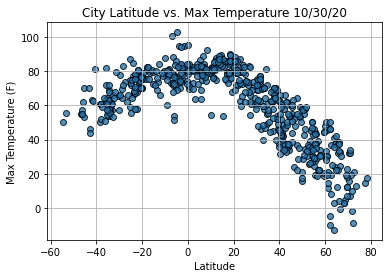

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

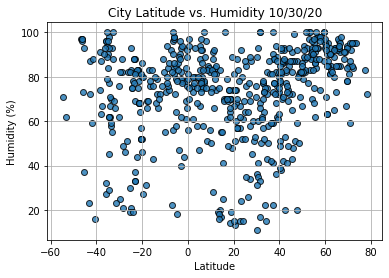

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

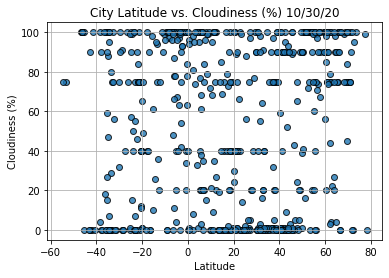

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

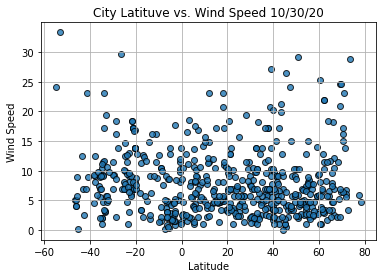

In [21]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate other graph properties
plt.title(f'City Latituve vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()

### Create a Linear Regression Function

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrame

In [41]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2020-10-30 18:36:22
Lat                        -53.15
Lng                        -70.92
Max Temp                     55.4
Humidity                       62
Cloudiness                     75
Wind Speed                  33.33
Name: 13, dtype: object

In [42]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2020-10-30 18:36:30,77.48,-69.36,14.90,83,99,5.95
1,Butaritari,KI,2020-10-30 18:39:10,3.07,172.79,81.34,80,74,18.50
6,Hays,US,2020-10-30 18:39:11,30.05,-98.03,69.01,36,0,1.99
7,Upernavik,GL,2020-10-30 18:36:29,72.79,-56.15,20.88,95,95,3.31
9,Margate,GB,2020-10-30 18:39:11,51.38,1.39,57.99,88,100,4.00
...,...,...,...,...,...,...,...,...,...
558,El Bordo,CO,2020-10-30 18:41:18,2.12,-76.98,80.55,61,8,2.59
560,Rudnogorsk,RU,2020-10-30 18:41:18,57.26,103.75,21.94,88,100,2.51
561,Tambura,SS,2020-10-30 18:41:18,5.60,27.47,68.74,97,61,1.36
566,Elizabeth City,US,2020-10-30 18:41:19,36.29,-76.25,62.60,59,90,17.22


In [43]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

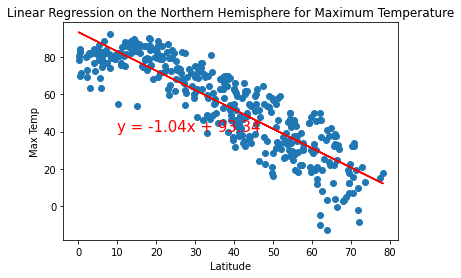

In [44]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

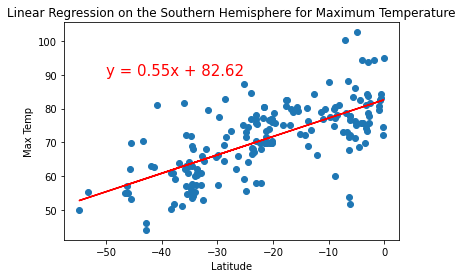

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

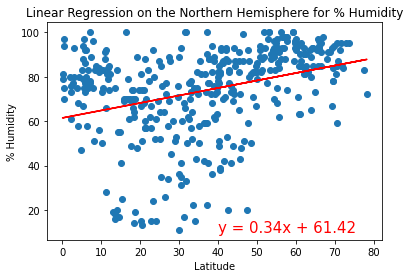

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

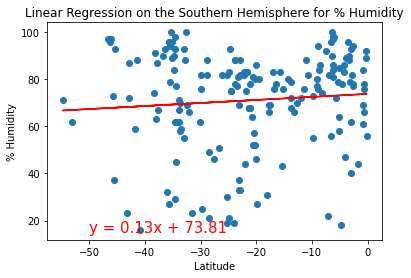

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

### 6.4.4 Skill Drill 

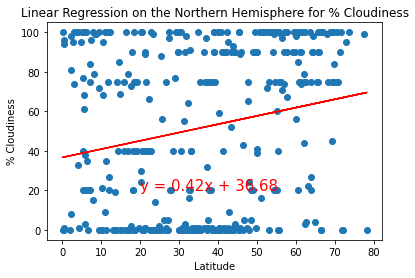

In [48]:
# Linear regression on Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (20,20))

#### Perform Linear Regression on % Cloudiness for the Southern Hemisphere

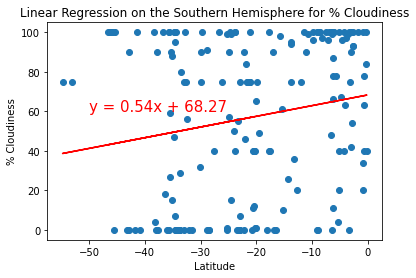

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

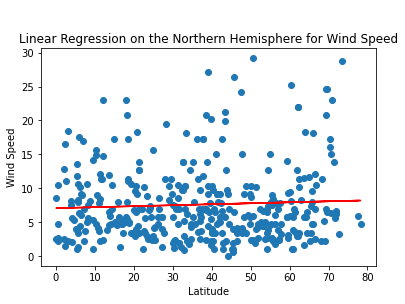

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

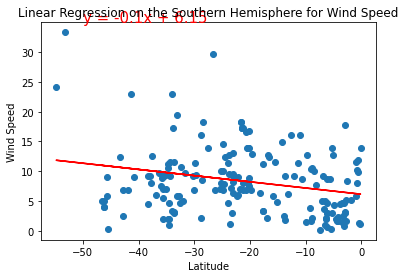

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))